In [17]:
from scipy import stats
from scipy.stats import norm
import numpy as np
import speed_db as db
from importlib import reload

In [18]:
np.random.seed(5)

In [19]:
n1 = 200
n2 = 300

In [20]:
rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1) #loc é a média, scale é o desvio padrão
rvs2 = stats.norm.rvs(size=n2, loc=0., scale=1)

In [21]:
stats.norm.pdf(-4)

0.00013383022576488537

In [22]:
np.exp(0**2/2)/np.sqrt(2*np.pi)

0.3989422804014327

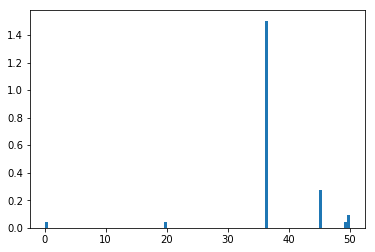

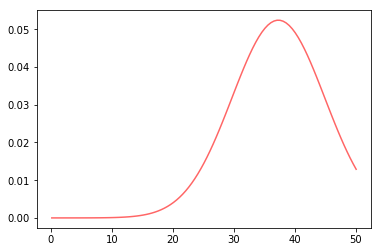

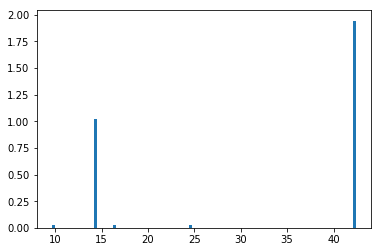

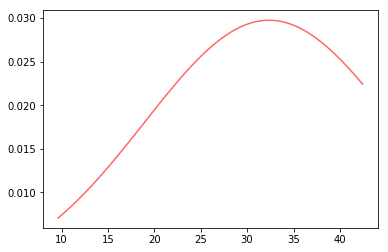

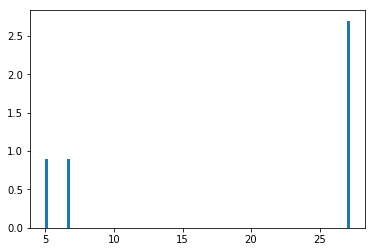

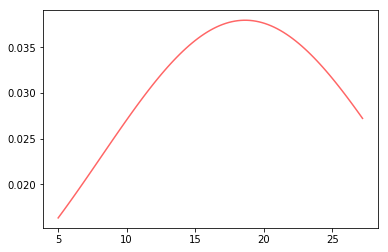

In [28]:
reload(db)
edge1 = db.access("taxi-fortaleza", "postgres", "1", "0")
db.plot_pdf(edge1)
edge2 = db.access("taxi-fortaleza", "postgres", "1", "1")
db.plot_pdf(edge2)
edge2 = db.access("taxi-fortaleza", "postgres", "1", "2")
db.plot_pdf(edge2)

In [29]:
edge1.head()

,traj_id,edge,date,speed,week_day
0,982346718,1,2016-06-12 01:46:30,49.046160,0
1,982344166,1,2016-06-19 15:38:17,19.981769,0
2,982344199,1,2016-06-19 00:09:41,50.026289,0
3,982344199,1,2016-06-19 00:09:41,50.026289,0
4,982347328,1,2016-06-26 04:19:09,0.142275,0


In [30]:
mean = np.mean(edge1.speed)
mean

37.27566390026251

In [31]:
std = np.std(edge1.speed)
std

7.613617144202238

In [32]:
stats.norm.pdf(0, loc=mean, scale=std)
r = edge1.speed
r.unique()


array([ 49.0461595 ,  19.98176869,  50.02628915,   0.14227469,
        45.23879523,  36.34768664])

In [33]:
norm.pdf(r.unique(), loc=mean, scale=std)

array([  1.58608237e-02,   3.97153378e-03,   1.28912166e-02,
         3.58054505e-07,   3.03233552e-02,   5.20107554e-02])

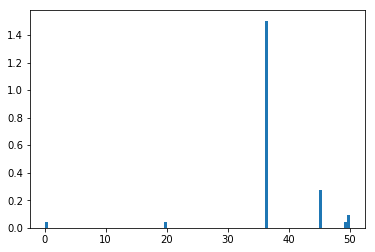

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
plt.subplot(111)
rv = stats.norm.rvs(loc=mean, scale=std, size = 1000) 
count, bins, ignored = plt.hist(r, normed=True, bins=100)
#count, bins, ignored = plt.hist(rv, normed=True)

plt.show()

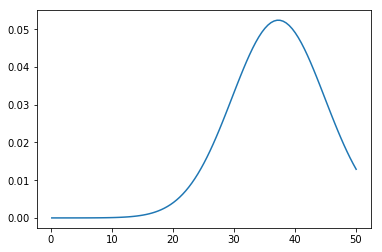

In [35]:
#plt.subplot(211)

plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2)))
plt.show()

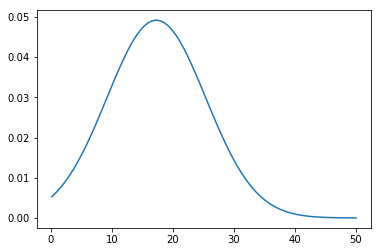

In [36]:
mean2 = mean -20
std2 = std +0.5
plt.plot(bins, 1/(std2 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean2)**2 / (2 * std2**2)))
plt.show()

In [17]:
norm.pdf(14,loc=mean, scale=std)

0.002941678441761476

In [37]:
# Comparar duas normais
pdf1 = norm.rvs(loc=mean, scale=std, size=100)
pdf2 = norm.rvs(loc=mean2, scale=std2, size=100)
stats.kstest(pdf1, norm.rvs, args=(mean2,std2))

ValueError: size does not match the broadcast shape of the parameters.